In [11]:
# To use torch in python.
import torch

# To create a model by layers.
import torch.nn as nn
import torch.nn.functional as F

# To set the optimization.
import torch.optim as optim
from torch.optim import lr_scheduler

# To manipulate arrays.
import numpy as np

# To save the best model and get data files.
import os
import copy

import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score,validation_curve
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss,classification_report
from tqdm import tqdm_notebook
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

import pywt
from scipy import stats

import torch
from tqdm import tqdm
from pylab import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.svm import SVC
import lightgbm as lgb
from datetime import datetime
from sklearn.preprocessing import label_binarize
from sklearn.metrics import *
from sklearn.neural_network import MLPClassifier
from collections import Counter
from lightgbm.sklearn import LGBMClassifier
from sklearn import metrics

import matplotlib.pyplot as plt

import os

import csv
import itertools
import collections


from sklearn.utils import resample

import keras
from keras.models import Sequential
from keras.layers import Conv1D, AvgPool1D, Flatten, Dense, Dropout, Softmax,MaxPool1D

from keras.optimizers import adam_v2 
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras import regularizers

%matplotlib inline

In [12]:
# Load the csv files over here into pandas data frame
# YOUR CODE HERE
# 0.1
def load_csv(file_name):
  # Input: csv_file_name
  # Output: pandas data frame
    data = pd.read_csv(file_name)
    return data

In [13]:
data = pd.read_csv('data.csv')
data = data.drop('Unnamed: 0',axis = 1)

# Exercise 1

In [ ]:
#txt to csv
# import csv
# TXT_folder_path = 'data_folder/TXT_files'
# for s in os.listdir(TXT_folder_path):
#     out = open(s + '.csv', 'w', newline = '')
#     csv_writer = csv.writer(out,dialect='excel')
#     f = open(TXT_folder_path + '/' + s, "r")
#     for line in f.readlines():
#         csv_writer.writerow(line.split())

In [ ]:
CSV_folder_path = 'data_folder/CSV_files'
TXT_csvfolder_path = 'data_folder/TXT_csvfiles'
csv_dir = os.listdir(CSV_folder_path)
txt_dir = os.listdir(TXT_csvfolder_path)
def preprocessor(csv_files, txt_files):
  # Input: List of all csv and txt files.
  # Output: Single dataframe containing entire data.
  # It is best to keep functions short(20 lines max), so feel free to use helper functions here.
    output = pd.DataFrame(columns = ['Type'])
    for i in range(len(csv_dir)):
        csv = load_csv(CSV_folder_path +'/'+ csv_dir[i])
        txt = load_csv(TXT_csvfolder_path + '/'+ txt_dir[i])
        if "'MLII'" in csv_1.columns:
            for j in range(len(txt['Sample #'])):
                csv_1 = csv.where(txt['Sample #'][j]-179<=csv["'sample #'"])\
                            .where(csv["'sample #'"]<=txt['Sample #'][j]+180)
                csv_1 = csv_1["'MLII'"].dropna()
                output = output.append(pd.Series(list(csv_1)),ignore_index=True)
                if txt['Type'][j] in ['N','L','R','A','V']:
                    output['Type'][j] = txt['Type'][j]
                else:
                    output['Type'][j] = 'U'
    return output
data = preprocessor(csv_dir,txt_dir)

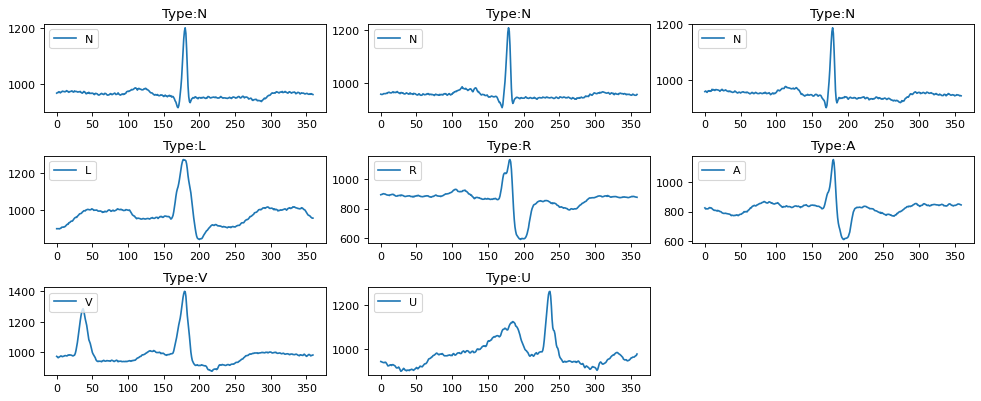

In [8]:
def plotting():
  # Plot a few heartbeats here with proper labelling.
    data_type = ['N','N','N','L','R','A','V','U']
    plt.figure(figsize = (15,8),dpi = 80)
    j = 1
    for i in data_type:
        tem = data.where(data['Type']==i)
        tem = tem.dropna()
        plt.subplot(4,3,j)
        plt.plot(range(360),tem.iloc[randint(100)][:-1],label= i)
        legend(loc='upper left')
        plt.title('Type:'+ i)
        j += 1
    plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.15,hspace=0.5)
plotting()

In [9]:
# Print length of dataframe you got after preprocessing.
len(data)

97838

# Exercise 2

In [14]:
def type_modify(data):
    for i in range(len(data['Type'])):
        if data['Type'][i] == 'N':
            data['Type'][i] = 0
        if data['Type'][i] == 'A':
            data['Type'][i] = 1
        if data['Type'][i] == 'U':
            data['Type'][i] = 2
        if data['Type'][i] == 'L':
            data['Type'][i] = 3
        if data['Type'][i] == 'R':
            data['Type'][i] = 4
        if data['Type'][i] == 'V':
            data['Type'][i] = 5
    return data
data = type_modify(data)

In [15]:
def cleaning(df):
  # Take all the features as input, and do any data cleaning necessary.
  # YOUR CODE HERE
    df_re = pd.DataFrame()
    for i in set(df['Type']):
        df_i = df.where(df['Type'] == i)
        df_i = df_i.replace(np.inf, np.nan)
        df_i = df_i.dropna(axis=0,how='all')
        df_i = df_i.fillna(df_i.mean())
        df_re = pd.concat([df_re,df_i],axis = 0)
    return df_re.sort_index()
data_cln = cleaning(data)

In [16]:
def normalizer(df,nor_type):
  # Taken input the output of cleaning function, and perform data normalization independently for all the features.
  # YOUR CODE HERE
    if nor_type == '0_1':
        data_0_1 = df.copy()
        scaler_0_1=MinMaxScaler()
        for col in df.columns.drop('Type'):
             data_0_1[col] = scaler_0_1.fit_transform(data_0_1[col].values.reshape(-1,1))
        return data_0_1
    elif nor_type == 'std':
        data_std = df.copy()
        std = StandardScaler()
        for col in df.columns.drop('Type'):
            data_std[col] = std.fit_transform(data_std[col].values.reshape(-1,1))
        return data_std
data_std = normalizer(data_cln,'0_1')

In [19]:
data_std.copy().drop('Type',axis = 1).describe()

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
count,97838.000000,97838.000000,97838.000000,97838.000000,97838.000000,97838.000000,97838.000000,97838.000000,97838.000000,97838.000000,...,97838.000000,97838.000000,97838.000000,97838.000000,97838.000000,97838.000000,97838.000000,97838.000000,97838.000000,97838.000000
mean,0.464954,0.464850,0.464743,0.464625,0.464509,0.464389,0.464292,0.464212,0.464157,0.464120,...,0.464042,0.464122,0.464216,0.464333,0.464458,0.464596,0.464743,0.464898,0.465057,0.465225
std,0.047207,0.046983,0.046745,0.046483,0.046217,0.045955,0.045698,0.045439,0.045170,0.044916,...,0.039682,0.039842,0.040011,0.040203,0.040411,0.040640,0.040888,0.041161,0.041451,0.041755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.434294,0.434294,0.434294,0.433806,0.433806,0.433317,0.433317,0.433317,0.433317,0.433806,...,0.443576,0.443576,0.444064,0.444064,0.444064,0.444064,0.444064,0.444553,0.444553,0.444553
50%,0.468002,0.468490,0.468490,0.468490,0.468490,0.468979,0.468979,0.468979,0.469468,0.469468,...,0.470933,0.470933,0.470933,0.470933,0.470933,0.470933,0.470933,0.470933,0.470933,0.470933
75%,0.484123,0.484123,0.484123,0.484123,0.484123,0.484123,0.484123,0.484612,0.484612,0.484612,...,0.483635,0.483635,0.483635,0.483635,0.483635,0.483635,0.483635,0.483635,0.483635,0.483635
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
data_std.groupby('Type').sum()

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
Type,,,,,,,,,,,,,,,,,,,,,
0,31578.914998,31570.221788,31562.964827,31556.523205,31551.426966,31547.465071,31546.957987,31549.507572,31555.354177,31562.559844,...,31876.430676,31886.892616,31898.366614,31911.585613,31926.230430,31942.752224,31961.127044,31980.777621,32000.553818,32020.909728
1,539.272594,539.257450,539.133854,538.941378,538.777723,538.613092,538.396190,538.308256,538.212995,538.374695,...,535.540303,535.443087,535.295066,535.259893,535.296043,535.322423,535.204201,534.912555,534.632633,534.452369
2,3997.477772,3991.652662,3984.971177,3977.459209,3969.643869,3960.924279,3951.567660,3941.319492,3930.353688,3919.033219,...,3654.478856,3652.099977,3649.877791,3648.030881,3646.363259,3644.813072,3642.905987,3641.052941,3639.166489,3637.221576
3,3790.012213,3791.814851,3794.046898,3796.459209,3798.993649,3801.661944,3804.562775,3807.489008,3810.628725,3813.881778,...,3899.807221,3897.848263,3895.949912,3893.853123,3891.407847,3888.682511,3886.008006,3883.192737,3880.569064,3877.976670
4,2483.837811,2486.901808,2489.715681,2492.734245,2495.732291,2498.820225,2501.943332,2504.898876,2507.693698,2510.348315,...,2465.130153,2466.410271,2467.823338,2469.346869,2470.701770,2471.861160,2472.822592,2473.862230,2474.884272,2476.052948
5,3100.639472,3100.167562,3098.664875,3095.910601,3092.077675,3087.427943,3081.968246,3076.003908,3069.988764,3064.379580,...,2969.541768,2970.030777,2970.627748,2971.330239,2971.653639,2971.758671,2971.449438,2970.850513,2970.458720,2970.051295


# Exercise 3

the number of 0 is: 69013 , accounts for 0.705
the number of 1 is: 1156 , accounts for 0.012
the number of 2 is: 7699 , accounts for 0.079
the number of 3 is: 8075 , accounts for 0.083
the number of 4 is: 5608 , accounts for 0.057
the number of 5 is: 6287 , accounts for 0.064


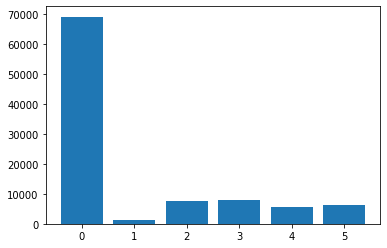

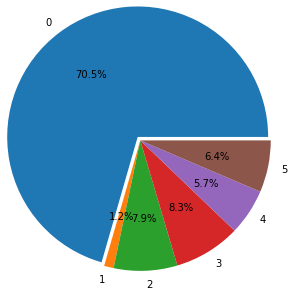

In [8]:
def class_imbalance_checker(df):
  # Print number of rows with each heartbeat type, along with plots to represent it.
    all_type = []
    for i in set(df['Type']):
        num = list(df['Type']).count(i)
        all_type.append(num)
        print('the number of',i,
              'is:',num,
              ', accounts for', round(num/len(df),3))
        
    plt.bar(list(set(df['Type'])),all_type)
    plt.show()
    
    plt.pie(all_type,
            labels=list(set(df['Type'])),
            autopct='%.1f%%',
            explode = [0.05, 0, 0, 0,0,0],
            radius=1.5)
    plt.show()
class_imbalance_checker(data_std)

In [17]:
def imbalance_remover_1(df):
  # Implement a method to handle class imbalance.
    under = RandomUnderSampler(random_state=42,sampling_strategy='majority')
    sm = SMOTE(random_state=42)
    
    x = df.copy().drop('Type',axis = 1)
    y = df['Type']
    
    under.fit(x, y)
    X_res, y_res = under.fit_resample(x, y)
    
    sm.fit(x,y)
    X_res, y_res = sm.fit_resample(X_res, y_res)
    
    print('Resampled dataset shape {}'.format(Counter(y_res)))
    
    return pd.concat([X_res,y_res],axis = 1)

def imbalance_remover_2(df):
  # Implement a method to handle class imbalance.
    sm = SMOTE(random_state=42)
    
    x = df.copy().drop('Type',axis = 1)
    y = df['Type']
    
    sm.fit(x,y)
    X_res, y_res = sm.fit_resample(x, y)
    
    print('Resampled dataset shape {}'.format(Counter(y_res)))
    
    return pd.concat([X_res,y_res],axis = 1)

data_removed = imbalance_remover_1(data_std)

Resampled dataset shape Counter({0: 8075, 1: 8075, 2: 8075, 3: 8075, 4: 8075, 5: 8075})


In [33]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve

X = np.array(data_std.drop('Type',axis = 1))
y = np.array(data_std['Type'])


input_dim = X.shape[1]


encoding_dim = 16
num_epoch = 15
batch_size = 32

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mae'])
checkpointer = ModelCheckpoint(filepath="SofaSofa_model.h5",
                               verbose=0,
                               save_best_only=True)
history = autoencoder.fit(X_train, X_train,
                          epochs=num_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1).history

Epoch 1/15
1212/1212 [==============================] - 1s 969us/step - loss: 0.0895 - mae: 0.2043 - val_loss: 0.0847 - val_mae: 0.1962
Epoch 2/15
1212/1212 [==============================] - 1s 901us/step - loss: 0.0771 - mae: 0.1753 - val_loss: 0.0677 - val_mae: 0.1544
Epoch 3/15
1212/1212 [==============================] - 1s 907us/step - loss: 0.0634 - mae: 0.1463 - val_loss: 0.0547 - val_mae: 0.1267
Epoch 4/15
1212/1212 [==============================] - 1s 929us/step - loss: 0.0535 - mae: 0.1250 - val_loss: 0.0528 - val_mae: 0.1220
Epoch 5/15
1212/1212 [==============================] - 1s 899us/step - loss: 0.0515 - mae: 0.1197 - val_loss: 0.0509 - val_mae: 0.1172
Epoch 6/15
1212/1212 [==============================] - 1s 908us/step - loss: 0.0493 - mae: 0.1147 - val_loss: 0.0473 - val_mae: 0.1090
Epoch 7/15
1212/1212 [==============================] - 1s 935us/step - loss: 0.0465 - mae: 0.1084 - val_loss: 0.0449 - val_mae: 0.1048
Epoch 8/15
1212/1212 [==========================

In [35]:
pred_test = autoencoder.predict(X_test)
pred_fraud = autoencoder.predict(X_train)

# Exercise 4

In [18]:
def noise_remover1(df):
    db4 = pywt.Wavelet('db4')
    for i in tqdm(range(len(df['0']))):
        coeffs = pywt.wavedec(df.iloc[i][:-1], db4)
        coeffs[len(coeffs)-1] *= 0
        coeffs[len(coeffs)-2] *= 0
        df.iloc[i][:-1] = pywt.waverec(coeffs,db4)
    return df
data_removed_1 = noise_remover1(data_removed)

100%|██████████| 48450/48450 [01:20<00:00, 599.42it/s]


In [27]:
def noise_remover2(df):
  # Take input the dataframe and remove noise from it.
    db8 = pywt.Wavelet('db8') 
    threshold = 0.1
    maxlev = pywt.dwt_max_level(len(df.iloc[0][:-1]),db8.dec_len)
    for i in tqdm(range(len(df['0']))):
        coffs=pywt.wavedec(df.iloc[i][:-1],db8,level=maxlev) 
        for i in range(1, len(coffs)):
            coffs[i] = pywt.threshold(coffs[i], threshold*max(coffs[i]))
        df.iloc[i][:-1] = pywt.waverec(coffs, db8)
    return df
data_removed_2 = noise_remover2(data_removed)

100%|██████████| 97838/97838 [01:10<00:00, 1381.85it/s]


# Exercise 5

In [19]:
# Splitting the dataset into train, val and test sets.
# 2.0
X = np.array(data_removed_1.drop('Type',axis = 1))
y = np.array(data_removed_1['Type'])

state = np.random.get_state()
np.random.shuffle(X)
np.random.set_state(state)
np.random.shuffle(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
y_train = np.array([int(i) for i in y_train])


In [37]:
def Model1(X_train, y_train):
  # You can use the sci-kit learn solver but capture any other hyper-parameter settings
  # or model settings in this method
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.125)
    history = {}
    eval_history = lgb.record_evaluation(history)
    
    model = LGBMClassifier()

    model.fit(X_train, y_train,
             eval_set= [(X_train, y_train), (X_val, y_val)],
             eval_metric='auc_mu',
             callbacks= [eval_history])

    return model,history
model1,history1 = Model1(X_train, y_train)

In [142]:
y_pred = model1.predict(X_test)
metrics(y_test,y_pred)

confusion_matrix:
[[1643    4    4    1    0    1]
 [  13 1567    5    0    2    0]
 [  22   20 1541    7    3   29]
 [   2    1   10 1602    0    6]
 [   6    0    0    0 1576    2]
 [   2    4   21    4    1 1591]]
---------------------------------
classification_report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1653
           1       0.98      0.99      0.98      1587
           2       0.97      0.95      0.96      1622
           3       0.99      0.99      0.99      1621
           4       1.00      0.99      1.00      1584
           5       0.98      0.98      0.98      1623

    accuracy                           0.98      9690
   macro avg       0.98      0.98      0.98      9690
weighted avg       0.98      0.98      0.98      9690

---------------------------------
accuracy_score:
0.9824561403508771
---------------------------------
f1_score:
0.9824561403508771


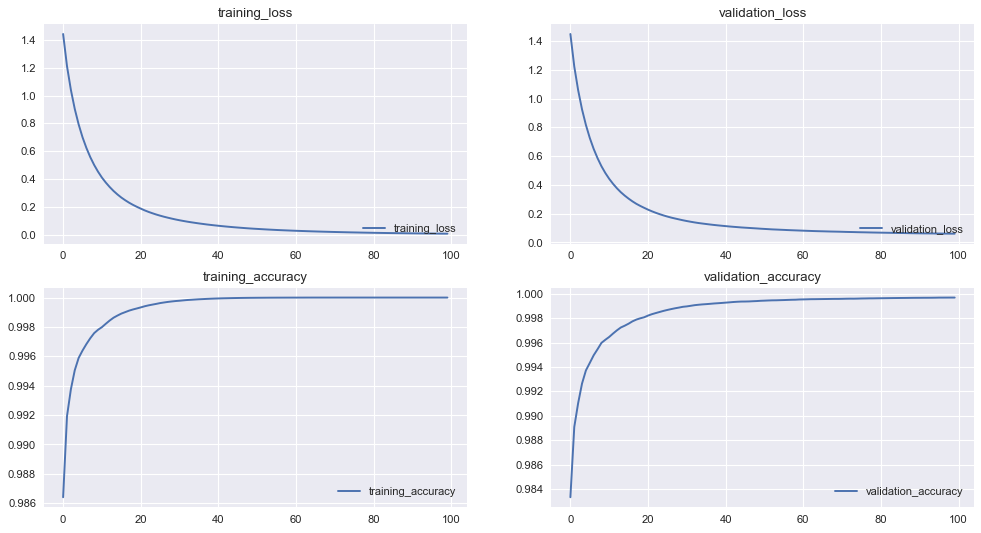

In [146]:
plotting_ffn(history1['training']['multi_logloss'],
             history1['valid_1']['multi_logloss'],
             history1['training']['auc_mu'],
             history1['valid_1']['auc_mu'])

# Exercise 6

In [136]:
def Model2(X_train, y_train):
  # Apply a feed-forward neural network along with hyper-parameter tuning for the same.
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.125)
    iter_num = 100
    history = {'training':{'auc_mu':[],'multi_logloss':[]},
              'valid_1':{'auc_mu':[],'multi_logloss':[]}}
    mlp = MLPClassifier(solver='sgd', 
                        activation='relu', 
                        alpha=1e-4, 
                        hidden_layer_sizes=(50, 50), 
                        random_state=42,
                        max_iter=1, 
                        verbose=True, 
                        learning_rate_init=.001,
                        validation_fraction = 0.125,)

                       
    for _ in range(iter_num):
        mlp.partial_fit(X_train, y_train,classes=[0,1,2,3,4,5])
        history['training']['auc_mu'].append(mlp.score(X_train,y_train))
        history['valid_1']['auc_mu'].append(mlp.score(X_val,y_val))
    history['training']['multi_logloss'] = mlp.loss_curve_
    history['valid_1']['multi_logloss'] = mlp.loss_curve_
    return mlp,history
model2,history2 = Model2(X_train, y_train)

Iteration 1, loss = 1.78258037
Iteration 2, loss = 1.76434738
Iteration 3, loss = 1.75021825
Iteration 4, loss = 1.73339510
Iteration 5, loss = 1.71314690
Iteration 6, loss = 1.68841061
Iteration 7, loss = 1.66370821
Iteration 8, loss = 1.63920434
Iteration 9, loss = 1.61508199
Iteration 10, loss = 1.59022049
Iteration 11, loss = 1.56365342
Iteration 12, loss = 1.53382980
Iteration 13, loss = 1.49953508
Iteration 14, loss = 1.46049160
Iteration 15, loss = 1.41735320
Iteration 16, loss = 1.37185987
Iteration 17, loss = 1.32632950
Iteration 18, loss = 1.28284736
Iteration 19, loss = 1.24261000
Iteration 20, loss = 1.20606493
Iteration 21, loss = 1.17300343
Iteration 22, loss = 1.14301363
Iteration 23, loss = 1.11556871
Iteration 24, loss = 1.09022163
Iteration 25, loss = 1.06659091
Iteration 26, loss = 1.04449871
Iteration 27, loss = 1.02376773
Iteration 28, loss = 1.00425733
Iteration 29, loss = 0.98599355
Iteration 30, loss = 0.96838682
Iteration 31, loss = 0.95181750
Iteration 32, los

In [141]:
y_pred = model2.predict(X_test)
metrics(y_test,y_pred)

confusion_matrix:
[[1118  389   81   50    9    6]
 [ 271 1136   45   28   95   12]
 [  65   83 1251  107    6  110]
 [  11    2   12 1562    0   34]
 [  19   10    6   14 1533    2]
 [   9   23   80   92   23 1396]]
---------------------------------
classification_report:
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1653
           1       0.69      0.72      0.70      1587
           2       0.85      0.77      0.81      1622
           3       0.84      0.96      0.90      1621
           4       0.92      0.97      0.94      1584
           5       0.89      0.86      0.88      1623

    accuracy                           0.83      9690
   macro avg       0.82      0.83      0.82      9690
weighted avg       0.82      0.83      0.82      9690

---------------------------------
accuracy_score:
0.8251805985552115
---------------------------------
f1_score:
0.8251805985552115


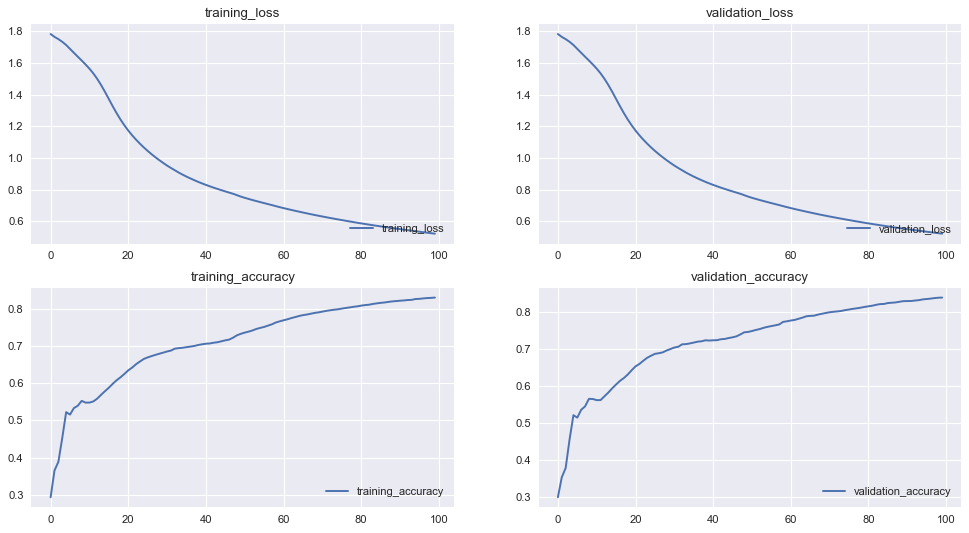

In [145]:
plotting_ffn(history2['training']['multi_logloss'],
             history2['valid_1']['multi_logloss'],
             history2['training']['auc_mu'],
             history2['valid_1']['auc_mu'])

In [20]:
def plotting_ffn(tra_loss,val_loss,tra_acc,val_acc):
  # Plotting the curves of training, validation and test sets losses and
  # accuracy scores with number of epochs on the x-axis.
    plt.figure(figsize = (15,8),dpi = 80)
    
    plt.subplot(2,2,1)
    plt.plot(tra_loss,label='training_loss')
    plt.title('training_loss')
    legend(loc='lower right')
    
    plt.subplot(2,2,2)
    plt.plot(val_loss,label='validation_loss')
    legend(loc='lower right')
    plt.title('validation_loss')
    
    plt.subplot(2,2,3)
    plt.plot(tra_acc,label='training_accuracy')
    legend(loc='lower right')
    plt.title('training_accuracy')
    
    plt.subplot(2,2,4)
    plt.plot(val_acc,label='validation_accuracy')
    legend(loc='lower right')
    plt.title('validation_accuracy')
    
    plt.show()

In [21]:
def metrics(y_test, y_pred):
  # Your code here for precision, recall, F1score, accuracy
  # You can call this code to compute metrics for your models
    con_matrix = confusion_matrix(y_test, y_pred)
    cla_report = classification_report(y_test, y_pred)
    acc_score = accuracy_score(y_test, y_pred)
    f1_score_ = f1_score(y_test, y_pred,average='micro')
    print('confusion_matrix:')
    print(con_matrix)
    print('---------------------------------')
    print('classification_report:')
    print(cla_report)
    print('---------------------------------')
    print('accuracy_score:')
    print(acc_score)
    print('---------------------------------')
    print('f1_score:')
    print(f1_score_)

# Exercise 7

In [24]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
# Add the implementation from a recent paper.
def recent_cnn(X_train, y_train,X_test, y_test):

    model = Sequential()

    model.add(Conv1D(filters=16, kernel_size=8, padding='same', 
                     activation='relu',input_shape=(360, 1),strides=1))
    model.add(MaxPool1D(pool_size = 2, strides=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu',strides=1))


    model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
    model.add(MaxPool1D(pool_size = 2, strides=1))
    model.add(Dropout(0.25))

    model.add(Dense(35,kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))

    model.add(Conv1D(filters=128, kernel_size=2, padding='same', activation='relu',strides=1))

    model.add(Conv1D(filters=256, kernel_size=2, padding='same', activation='relu',strides=1))
    model.add(MaxPool1D(pool_size = 2, strides=2))

    model.add(Flatten())
    model.add(Dropout(0.25))

    model.add(Dense(6,kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))

    model.add(Softmax())

    model.summary()





    adam = adam_v2.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy',  optimizer=adam,metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=72, epochs=50, verbose=1, validation_data=(X_test, y_test))
    
    return history,model

history,model_cnn = recent_cnn(X_train, y_train,X_test, y_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 360, 16)           144       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 180, 16)          0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 180, 16)           0         
                                                                 
 conv1d_11 (Conv1D)          (None, 180, 32)           2080      
                                                                 
 conv1d_12 (Conv1D)          (None, 180, 64)           8256      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 179, 64)          0         
 1D)                                                  

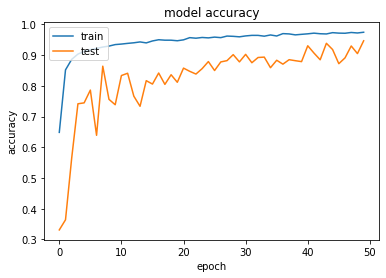

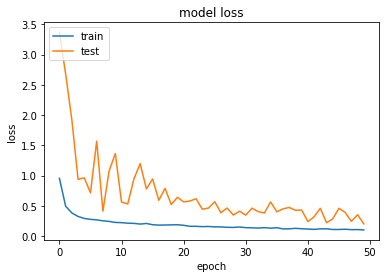

In [27]:
def plotting_nn(history):
  # Plotting the curves of training, validation and test sets losses and
  # accuracy scores with number of epochs on the x-axis.
    # summarize history for loss
# summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
plotting_nn(history)   

In [34]:
# In order to get a faster training progress, I just set 50epochs to train, so which led to a lower accuracy and f1-score than paper.
# Actually I have tried a 200 epochs train, and it arrived about 0.9703 which is much closer than this.
y_pred_cnn = model_cnn.predict(X_test)
y_pred_cnn = [list(i).index(max(i)) for i in y_pred_cnn]
y_test = [list(i).index(max(i)) for i in y_test]
metrics(y_test,y_pred_cnn)

confusion_matrix:
[[1482  118    1    1    2    8]
 [  44 1547    1   16    5    1]
 [  55   49 1428    7    6   40]
 [  32    5    2 1589    0    5]
 [  17    3    3    0 1597    5]
 [   5   44   15   24    4 1529]]
---------------------------------
classification_report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1612
           1       0.88      0.96      0.92      1614
           2       0.98      0.90      0.94      1585
           3       0.97      0.97      0.97      1633
           4       0.99      0.98      0.99      1625
           5       0.96      0.94      0.95      1621

    accuracy                           0.95      9690
   macro avg       0.95      0.95      0.95      9690
weighted avg       0.95      0.95      0.95      9690

---------------------------------
accuracy_score:
0.9465428276573787
---------------------------------
f1_score:
0.9465428276573787


# Exercise 8

In [ ]:
# Running with some other data.
# Call previously defined functions for the new set of input feature values.
CSV_folder_path = 'data_folder/CSV_files'
TXT_csvfolder_path = 'data_folder/TXT_csvfiles'
csv_dir = os.listdir(CSV_folder_path)
txt_dir = os.listdir(TXT_csvfolder_path)
def preprocessor(csv_files, txt_files):
  # Input: List of all csv and txt files.
  # Output: Single dataframe containing entire data.
  # It is best to keep functions short(20 lines max), so feel free to use helper functions here.
    output = pd.DataFrame(columns = ['Type'])
    for i in range(len(csv_dir)):
        csv = load_csv(CSV_folder_path +'/'+ csv_dir[i])
        txt = load_csv(TXT_csvfolder_path + '/'+ txt_dir[i])
        if "'V1'" in csv.columns:
            for j in range(len(txt['Sample #'])):
                csv_1 = csv.where(txt['Sample #'][j]-179<=csv["'sample #'"])\
                            .where(csv["'sample #'"]<=txt['Sample #'][j]+180)
                csv_1 = csv_1["'V1'"].dropna()
                output = output.append(pd.Series(list(csv_1)),ignore_index=True)
                if txt['Type'][j] in ['N','L','R','A','V']:
                    output['Type'][j] = txt['Type'][j]
                else:
                    output['Type'][j] = 'U'
    return output
data_new = preprocessor(csv_dir,txt_dir)

confusion_matrix:
[[1601    2    7    0    2    0]
 [   8 1598    3    0    0    0]
 [  19    9 1526    2    8   24]
 [   3    0    7 1587    1    2]
 [   5    0    2    0 1614    0]
 [   5    5   20    6    1 1623]]
---------------------------------
classification_report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1612
           1       0.99      0.99      0.99      1609
           2       0.98      0.96      0.97      1588
           3       0.99      0.99      0.99      1600
           4       0.99      1.00      0.99      1621
           5       0.98      0.98      0.98      1660

    accuracy                           0.99      9690
   macro avg       0.99      0.99      0.99      9690
weighted avg       0.99      0.99      0.99      9690

---------------------------------
accuracy_score:
0.9854489164086687
---------------------------------
f1_score:
0.9854489164086687


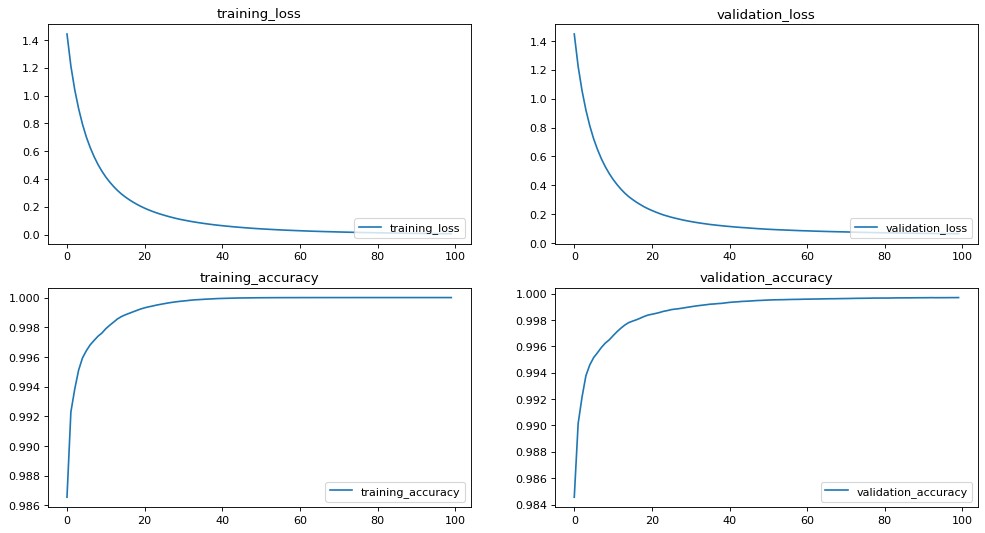

In [41]:
data = type_modify(data)
data_cln = cleaning(data)
data_std = normalizer(data_cln,'0_1')
data_removed = imbalance_remover_1(data_std)
data_removed_1 = noise_remover1(data_removed)

X = np.array(data_removed_1.drop('Type',axis = 1))
y = np.array(data_removed_1['Type'])

state = np.random.get_state()
np.random.shuffle(X)
np.random.set_state(state)
np.random.shuffle(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
y_train = np.array([int(i) for i in y_train])

model1,history1 = Model1(X_train, y_train)

y_pred = model1.predict(X_test)
metrics(y_test,y_pred)

plotting_ffn(history1['training']['multi_logloss'],
             history1['valid_1']['multi_logloss'],
             history1['training']['auc_mu'],
             history1['valid_1']['auc_mu'])

# Exercise 10

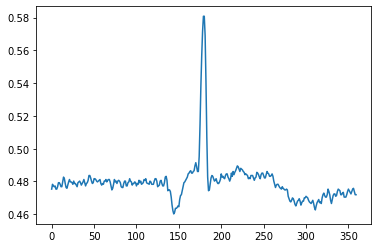

False negatives


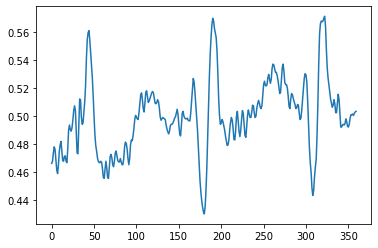

False positives


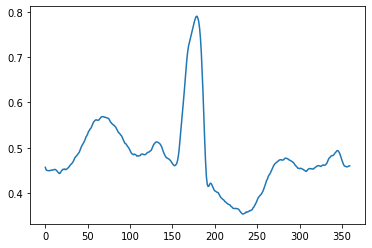

False negatives


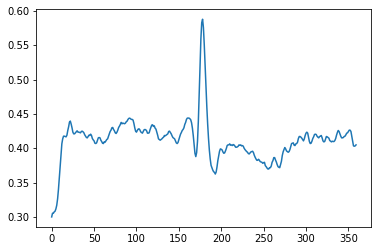

False negatives


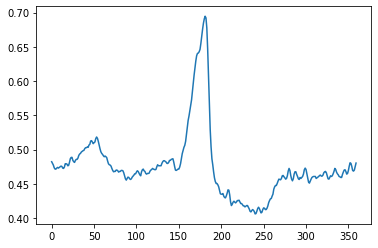

False negatives


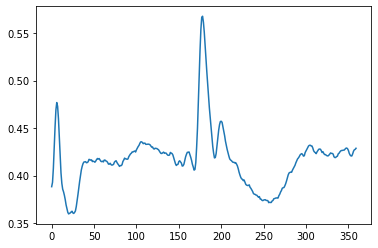

False negatives


In [42]:
def plot_final(X_test,y_test):
  # lot examples or time-series snippets of
  # mis-classified arrhythmia (False positives) and also false negatives.
    flag = 0
    for i in range(len(X_test)):
        tem_pred = model1.predict(X_test[i].reshape(1, -1))
        if tem_pred != y_test[i] and y_test[i] == 0:
            plt.plot(X_test[i])
            plt.show()
            print('False positives')
            flag += 1
        if tem_pred != y_test[i] and y_test[i] != 0:
            plt.plot(X_test[i])
            plt.show()
            print('False negatives')
            flag += 1
        if flag == 6:
            break
plot_final(X_test,y_test)